<h1>
<center>CFRM 421/521, Spring 2023</center>
</h1>

<h1>
<center>Yoshihiro Shirai</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Monday, May 27, 2025, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

**Solution**

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
print("np version:", np.__version__)
print("tf version:", tf.__version__)

np version: 1.26.4
tf version: 2.16.1


In [4]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

Train the regression MLP with the output layer having a ReLU activation function. The correct initialization is He.

In [6]:
from absl import logging

reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="relu", kernel_initializer="he_normal")
])
logging.set_verbosity(logging.ERROR) #This is to suppress some warnings
model.compile(loss="mse", optimizer="nadam")
run = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),verbose=1)

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 11.8401 - val_loss: 5.7371
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 5.5688 - val_loss: 5.7371
Epoch 12/30
413/413 ━━━━━━━━━

The loss (MSE) on the validation set is 5.74.

Next, train the regression MLP with the output layer having the identity activation function. The correct initialization for the idenity activation is Glorot, which is already the default.

In [7]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation=None)
])
model.compile(loss="mse", optimizer="nadam")
run = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid))

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - loss: 139144.3594 - val_loss: 7.5700
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 5.4937 - val_loss: 4.7306
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 3.9789 - val_loss: 3.4924
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 3.1580 - val_loss: 2.8243
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 2.5716 - val_loss: 2.4072
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 2.1438 - val_loss: 2.1444
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 1.8423 - val_loss: 2.1095
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.6620 - val_loss: 1.8044
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 1.4989 - val_loss: 1.7211
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 1.3898 - val_loss: 1.6159
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 1.3075 - val_loss: 1.5340
Epoch 12/30
413/413 ━━━━━

The loss (MSE) on the validation set is now 3.61, which is lower. Thus, using ReLU as the output layer activation function is worse than using the identity. On one hand, using ReLU is the logical choice as the output being a house price should be positive, on the other hand, since the house prices are largely positive, the output will almost certainly be in the positive part anyway, which is why it makes  no difference in MSE either way.

You may get a very different answer depending on randomness.

## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

**Solution**

Set up the tuner.

In [8]:
import keras_tuner as kt

In [9]:
reset_session()

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=100)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    l2 = hp.Float("l2", min_value=1e-4, max_value=100,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "nadam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Normalization(input_shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,  activation="relu", kernel_initializer="he_normal",
                                        kernel_regularizer=tf.keras.regularizers.l2(l2)))
    model.add(tf.keras.layers.Dense(1,activation=None, kernel_initializer="he_normal",
                                    kernel_regularizer=tf.keras.regularizers.l2(l2)))
    model.compile(loss="mse", optimizer="Nadam")
    return model

In [10]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_loss", max_trials=20, overwrite=True,
    directory="ca_housing", project_name="rand_search", seed=42)
random_search_tuner.search(X_train[:5000], y_train[:5000], epochs=20,
                           validation_data=(X_valid, y_valid))

Trial 20 Complete [00h 00m 05s]
val_loss: 70.78791046142578

Best val_loss So Far: 1.634425401687622
Total elapsed time: 00h 01m 58s


Here is the best model.

In [16]:
from absl import logging
top3_models = random_search_tuner.get_best_models(num_models=3)
logging.set_verbosity(logging.ERROR) #This is to suppress some warnings
best_model = top3_models[0]

Here are the parameters of the best model. This can be extremely different based on randomness.

In [17]:
random_search_tuner.get_best_hyperparameters(num_trials=1)[0].values

{'n_hidden': 1,
 'n_neurons': 59,
 'learning_rate': 0.00028078309037793175,
 'l2': 0.0070281420128455755,
 'optimizer': 'sgd'}

Optional:

In [18]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 59)             │           531 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 608 (2.38 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 17 (72.00 B)

## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

**Solution**

Fit the best model and to get the learning curve we fit the model and use .history.

In [13]:
reset_session()

run = best_model.fit(X_train, y_train, epochs=200,
                validation_data=(X_valid, y_valid),verbose=1)

Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 19.3203 - val_loss: 1.2728
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4314 - val_loss: 6.2411
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0618 - val_loss: 17.4708
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3181 - val_loss: 12.4820
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0774 - val_loss: 15.1808
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4564 - val_loss: 18.9067
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5327 - val_loss: 25.1327
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.9290 - val_loss: 23.9422
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5318 - val_loss: 20.8755
Epoch 10/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4120 - val_loss: 12.9240
Epoch 11/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4408 - val_loss: 18.2796
Epoch 12/200
413/413 ━━━━━━━━━━

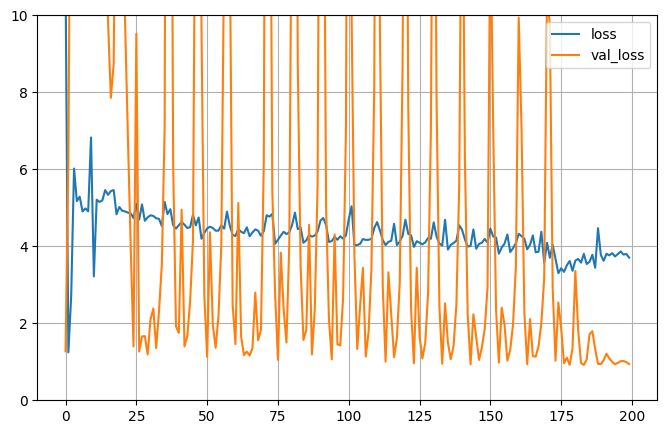

In [14]:
pd.DataFrame(run.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()

The model is overfitting a little (validation loss is larger loss near the end) in this run.

The plot may be very different, it can look very erratic in some runs. It is heavily affected by the training randomness."

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("datasets/bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)

df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [8]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

**Solution**

Here are the justifications:

(i) Swish is a good choice because it is considered one of the best activation functions (non-saturating so it avoids vanishing graidents, avoids the dying ReLU problem, non-monotonic allowing for more complicated fits). He initialization is the corresponding weight initialization method.

(ii) This is a binary classification problem so the sigmoid activation ensures the output should be a number between 0 and 1 (if the output is greater than 0.5, predict it as class 1, otherwise predict it as class 0).

(iii) For binary classification the loss should be binary_crossentropy (the loss function for logistic regression). The data is highly imbalanced as shown below, so AUC is a better metric than accuracy.

In [9]:
print("The proportion of sucessses is", sum(y_train==1)/len(y_train))

The proportion of sucessses is 0.11168075907717029


## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

In [10]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)

**Solution**

In [14]:
reset_session()

model = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
logging.set_verbosity(logging.ERROR) #This is to suppress some warnings
optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])

We create the exponential scheduling callback, and then fit the model

In [20]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay(lr0=0.01,s=20))

run = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8246 - loss: 0.2835 - val_AUC: 0.8958 - val_loss: 0.2277 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9069 - loss: 0.2183 - val_AUC: 0.9029 - val_loss: 0.2209 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9138 - loss: 0.2117 - val_AUC: 0.9060 - val_loss: 0.2175 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9180 - loss: 0.2075 - val_AUC: 0.9077 - val_loss: 0.2153 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9212 - loss: 0.2043 - val_AUC: 0.9092 - val_loss: 0.2138 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9238 - loss: 0.2017 - val_AUC: 0.9094 - val_loss: 0.2126 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9260 - loss: 0.1994 - val_AUC: 0.9105 - val_loss: 0.2117 - learning_rate: 0.0050
Epoch 

Now we plot the learning curve. The first line makes the plot look cleaner by removing the learning rate from the plot since it's not useful here. Comparing the AUC and the validation AUC (or the loss and validation loss), there is a small amount of overfitting.

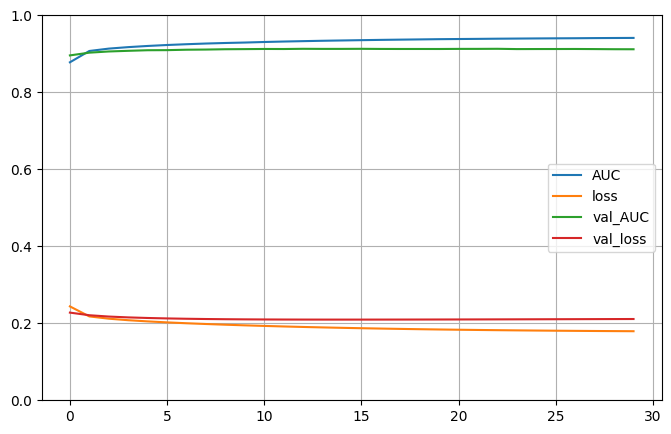

In [21]:
run_history = {key: run.history[key] for key in list(run.history.keys())[:-1]}
pd.DataFrame(run_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

**Solution**

Here we try 6 regularization methods. Because the amount of overfitting is small, we will use a smaller amount of regularization than the default parameters (e.g. for dropout, less than 20%), otherwise we would underfit. However, the question doesn't require you to choose the best hyperparameters, so it is acceptable to use the defaults.

(i) Batch normalization

In [22]:
reset_session()

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.BatchNormalization())
for n_hidden in (100, 100, 100, 100):
    model1.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal"))
    model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model1.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
run = model1.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - AUC: 0.7900 - loss: 0.3243 - val_AUC: 0.8778 - val_loss: 0.2401 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9023 - loss: 0.2227 - val_AUC: 0.8817 - val_loss: 0.2398 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9188 - loss: 0.2060 - val_AUC: 0.8771 - val_loss: 0.2479 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9322 - loss: 0.1906 - val_AUC: 0.8717 - val_loss: 0.2595 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9442 - loss: 0.1748 - val_AUC: 0.8644 - val_loss: 0.2744 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9550 - loss: 0.1578 - val_AUC: 0.8519 - val_loss: 0.2937 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9652 - loss: 0.1398 - val_AUC: 0.8416 - val_loss: 0.3183 - learning_rate: 0.0050
Epoch

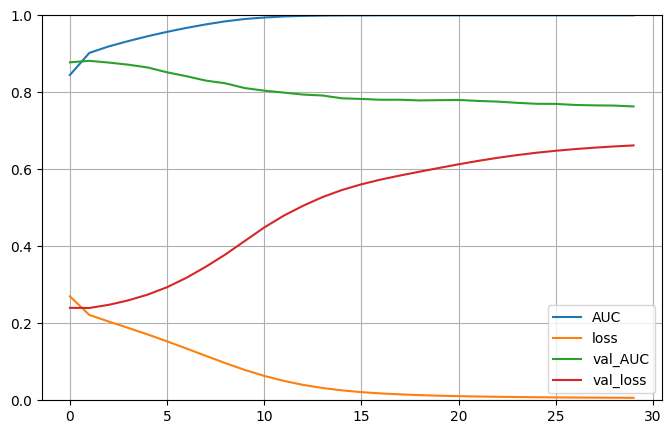

In [23]:
run_history = {key: run.history[key] for key in list(run.history.keys())[:-1]}
pd.DataFrame(run_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Comment: Validation AUC in (b) is 0.9134. Here it is 0.8998. Worse. (The learning curve above is not required by the question, and depending on randomness, it could be better not worse and this applies to other variations below.)

(ii) Early stopping

In [17]:
reset_session()

model2 = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model2.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal"))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

logging.set_verbosity(logging.ERROR) #This is to suppress some warnings

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True,
                                                  monitor="val_AUC", mode="max")
model2.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
run = model2.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8190 - loss: 0.2831 - val_AUC: 0.8997 - val_loss: 0.2233 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9066 - loss: 0.2185 - val_AUC: 0.9041 - val_loss: 0.2194 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9122 - loss: 0.2132 - val_AUC: 0.9064 - val_loss: 0.2174 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9162 - loss: 0.2096 - val_AUC: 0.9082 - val_loss: 0.2157 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9191 - loss: 0.2066 - val_AUC: 0.9091 - val_loss: 0.2143 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9216 - loss: 0.2039 - val_AUC: 0.9101 - val_loss: 0.2130 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9238 - loss: 0.2015 - val_AUC: 0.9110 - val_loss: 0.2119 - learning_rate: 0.0050
Epoch 

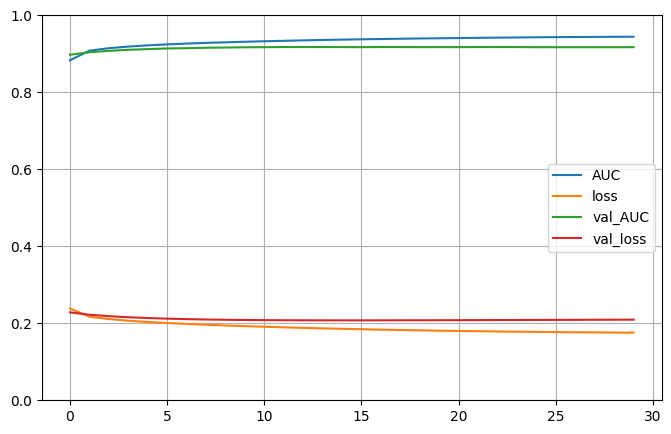

In [25]:
run_history = {key: run.history[key] for key in list(run.history.keys())[:-1]}
pd.DataFrame(run_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Note: The chosen model is usually the model of the last epoch (not the one with the best validation AUC). But here using early stopping with the argument `restore_best_weights=True`, the chosen model rolls back to the epoch with the best validation AUC, which is not necessarily the last epoch. We evaluate the model, to help us get the result of the chosen model. Alternatively, you can search through the output above for the maximum validation AUC, but this is the same while being more efficient. The question does not require `restore_best_weights=True`, and if that is not set, then the chosen model is the last epoch.

In [26]:
model2.evaluate(X_valid, y_valid)

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9170 - loss: 0.2155


[0.20943735539913177, 0.917201817035675]

Comment: Validation AUC in (b) is 0.9134. Here it is 0.9155. Better. (The learning curve above is not required by the question.)

(iii) $\ell_2$ regularization

In [27]:
reset_session()

model3 = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model3.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal",
                                 kernel_regularizer=tf.keras.regularizers.l2(0.0002)))
model3.add(tf.keras.layers.Dense(1, activation="sigmoid",
                             kernel_regularizer=tf.keras.regularizers.l2(0.0002)))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model3.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
run = model3.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8289 - loss: 0.4369 - val_AUC: 0.8947 - val_loss: 0.3786 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9058 - loss: 0.3682 - val_AUC: 0.9003 - val_loss: 0.3661 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9111 - loss: 0.3556 - val_AUC: 0.9033 - val_loss: 0.3567 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9146 - loss: 0.3460 - val_AUC: 0.9056 - val_loss: 0.3490 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9170 - loss: 0.3383 - val_AUC: 0.9078 - val_loss: 0.3425 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9191 - loss: 0.3319 - val_AUC: 0.9091 - val_loss: 0.3371 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9207 - loss: 0.3265 - val_AUC: 0.9102 - val_loss: 0.3325 - learning_rate: 0.0050
Epoch 

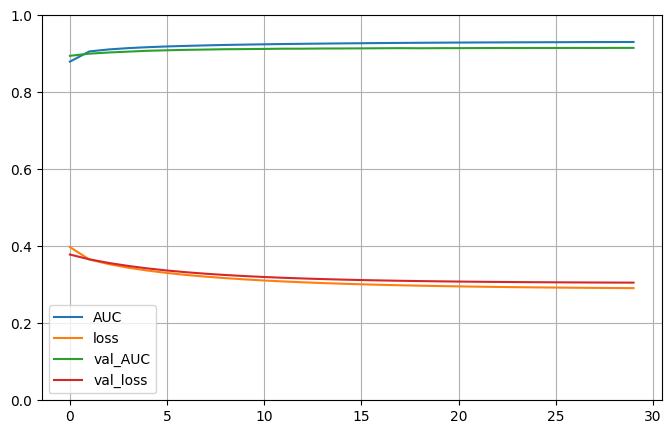

In [28]:
run_history = {key: run.history[key] for key in list(run.history.keys())[:-1]}
pd.DataFrame(run_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Comment: Validation AUC in (b) is 0.91434. Here it is 0.9157. Better. (The learning curve above is not required by the question.)

(iv) Dropout

In [29]:
reset_session()

model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Dropout(rate=0.02))
for n_hidden in (100, 100, 100, 100):
    model4.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal"))
    model4.add(tf.keras.layers.Dropout(rate=0.02))
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model4.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
run = model4.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8225 - loss: 0.2807 - val_AUC: 0.8986 - val_loss: 0.2267 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8985 - loss: 0.2257 - val_AUC: 0.9042 - val_loss: 0.2209 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9043 - loss: 0.2207 - val_AUC: 0.9076 - val_loss: 0.2169 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9111 - loss: 0.2138 - val_AUC: 0.9084 - val_loss: 0.2152 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9119 - loss: 0.2132 - val_AUC: 0.9111 - val_loss: 0.2130 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9127 - loss: 0.2123 - val_AUC: 0.9124 - val_loss: 0.2110 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9167 - loss: 0.2081 - val_AUC: 0.9134 - val_loss: 0.2102 - learning_rate: 0.0050
Epoch 

Comment: Validation AUC in (b) is 0.9134. Here it is 0.9191. Better.

(v) $\ell_2$ regularization and early stopping

In [18]:
reset_session()

model5 = tf.keras.models.Sequential()
for n_hidden in (100, 100, 100, 100):
    model5.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal",
                                 kernel_regularizer=tf.keras.regularizers.l2(0.0002)))
model5.add(tf.keras.layers.Dense(1, activation="sigmoid",
                             kernel_regularizer=tf.keras.regularizers.l2(0.0002)))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True,
                                                  monitor="val_AUC", mode="max")
model5.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
run = model5.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[early_stopping_cb, lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8126 - loss: 0.4461 - val_AUC: 0.8957 - val_loss: 0.3796 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9065 - loss: 0.3698 - val_AUC: 0.9012 - val_loss: 0.3666 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9117 - loss: 0.3570 - val_AUC: 0.9037 - val_loss: 0.3573 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9148 - loss: 0.3477 - val_AUC: 0.9056 - val_loss: 0.3498 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9171 - loss: 0.3402 - val_AUC: 0.9076 - val_loss: 0.3435 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9190 - loss: 0.3339 - val_AUC: 0.9090 - val_loss: 0.3382 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.9206 - loss: 0.3286 - val_AUC: 0.9102 - val_loss: 0.3337 - learning_rate: 0.0050
Epoch 

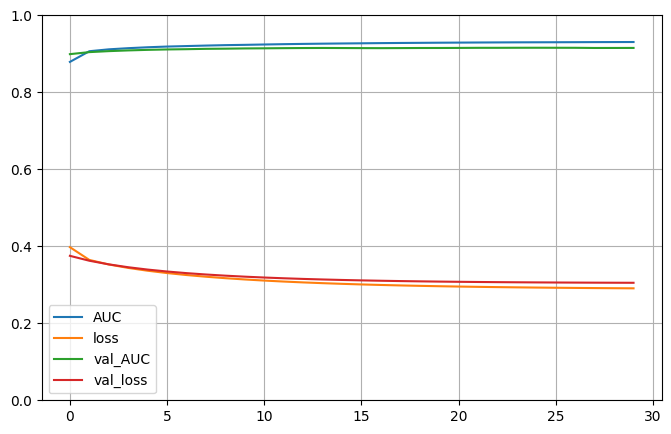

In [31]:
run_history = {key: run.history[key] for key in list(run.history.keys())[:-1]}
pd.DataFrame(run_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model5.evaluate(X_valid, y_valid)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - AUC: 0.9167 - loss: 0.3094


[0.30516430735588074, 0.9151849150657654]

Comment: Validation AUC in (c) is 0.9191. Here it is 0.9158. Worse. (The learning curve above is not required by the question.)

(vi) Batch normalization and dropout (you can try either order).

In [33]:
reset_session()

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.Dropout(rate=0.02))
for n_hidden in (100, 100, 100, 100):
    model6.add(tf.keras.layers.Dense(n_hidden, activation="swish",
                                 kernel_initializer="he_normal"))
    model6.add(tf.keras.layers.BatchNormalization())
    model6.add(tf.keras.layers.Dropout(rate=0.2))
model6.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
model6.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["AUC"])
run = model6.fit(X_train, y_train, epochs=30,
                validation_data=(X_valid, y_valid),
                callbacks=[lr_scheduler])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7420 - loss: 0.3603 - val_AUC: 0.8807 - val_loss: 0.2409 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8670 - loss: 0.2543 - val_AUC: 0.8875 - val_loss: 0.2324 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8725 - loss: 0.2483 - val_AUC: 0.8902 - val_loss: 0.2310 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8816 - loss: 0.2416 - val_AUC: 0.8934 - val_loss: 0.2285 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8825 - loss: 0.2406 - val_AUC: 0.8921 - val_loss: 0.2296 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8843 - loss: 0.2399 - val_AUC: 0.8960 - val_loss: 0.2264 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8862 - loss: 0.2374 - val_AUC: 0.8973 - val_loss: 0.2249 - learning_rate: 0.0050
Epoch 

Comment: Validation AUC in (c) is 0.9191. Here it is 0.9083. Worse.

## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

**Solution**

Recall that the learning curve is misleading for model (c)(iv) with dropout. We directly evaluate the model on the training and validation set.

In [34]:
model4.evaluate(X_train, y_train)

817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - AUC: 0.9347 - loss: 0.1878


[0.18536752462387085, 0.9376757144927979]

In [35]:
model4.evaluate(X_valid, y_valid)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - AUC: 0.9160 - loss: 0.2131


[0.2060478925704956, 0.917145848274231]

In [36]:
model.evaluate(X_train,y_train)

817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - AUC: 0.9399 - loss: 0.1802


[0.17843127250671387, 0.9419971704483032]

In [37]:
model.evaluate(X_valid,y_valid)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - AUC: 0.9123 - loss: 0.2178


[0.2110816240310669, 0.9117367267608643]

The model is overfitting less than the model in (b) (it is still overfitting).

You can try higher values for the dropout rate which will reduce overfitting, but it may lead to a worse overall model if it reduces the validation AUC. Also, this is not as badly overfitting as (c).

## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

**Solution**

We evaluate the model in (c)(v) on the test set.

In [38]:
model5.evaluate(X_test, y_test)

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - AUC: 0.9229 - loss: 0.3045


[0.30492961406707764, 0.9279990196228027]

On the test set, `model5` has AUC 0.9277. The confusion matrix on the test set is given below.

In [39]:
from sklearn.metrics import confusion_matrix

y_pred = (model5.predict(X_test) >= 0.5)
confusion_matrix(y_test, y_pred)

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


array([[6942,  224],
       [ 552,  451]], dtype=int64)

# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [19]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**Solution**

Drop the missing values.

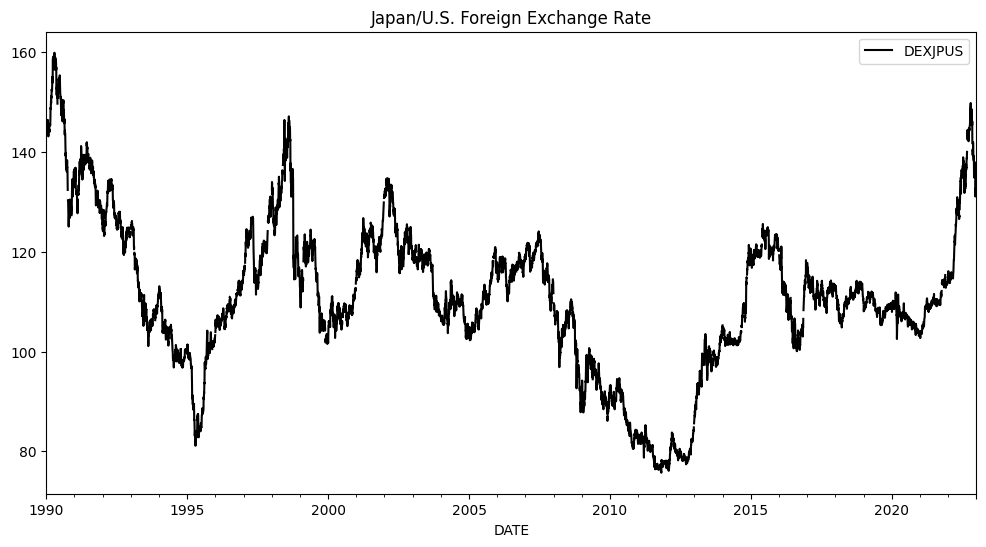

In [22]:
data.plot(
    figsize=(12,6),
    title="Japan/U.S. Foreign Exchange Rate",
    style='k-',
)
plt.show()

data = data.dropna()

Next, split the data into a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data).

In [23]:
def ts_split(ts, feature_steps=14, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X, y

time_steps = 10
ts = data.values.flatten()
X, y = ts_split(ts,feature_steps=time_steps)

train_idx = sum(data.index.year < 2010)-time_steps
valid_idx = sum(data.index.year < 2016)-time_steps
X_train = X[:train_idx]
y_train = y[:train_idx]
X_valid = X[train_idx:valid_idx]
y_valid = y[train_idx:valid_idx]
X_test = X[valid_idx:]
y_test = y[valid_idx:]

In [24]:
X_train

array([[146.25, 145.7 , 143.37, ..., 145.4 , 145.4 , 145.48],
       [145.7 , 143.37, 143.82, ..., 145.4 , 145.48, 145.49],
       [143.37, 143.82, 144.1 , ..., 145.48, 145.49, 146.12],
       ...,
       [ 88.65,  89.91,  89.52, ...,  91.52,  91.69,  91.57],
       [ 89.91,  89.52,  90.35, ...,  91.69,  91.57,  91.95],
       [ 89.52,  90.35,  90.47, ...,  91.57,  91.95,  92.66]])

In [25]:
y_train

array([[145.49],
       [146.12],
       [145.65],
       ...,
       [ 91.95],
       [ 92.66],
       [ 93.08]])

In [26]:
train_idx

5023

In [27]:
valid_idx

6527

## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [28]:
movement_test = X_test[:,-1] < y_test.ravel()

**Solution**

We fit a random forest using the default value of `n_estimators`, make the predictions on the test set, and compute the MSE.

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train.ravel())
y_pred = forest.predict(X_test)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.527086340045793

We now compute the actual and predicted movement directions on the test set. Let  $S_t$ be the exchange rate at time $t$. Here, the up movement $S_t-S_{t-1}>0$ is denoted as True (1), and the down movement 
$S_t-S_{t-1}\leq0$ is denoted False (0).

In [30]:
from sklearn.metrics import accuracy_score

movement_test = X_test[:,-1] < y_test.ravel()
movement_pred = X_test[:,-1] < y_pred
accuracy_score(movement_test, movement_pred)

0.5197481396680023

For context, predicting all movements as up or down gives the following accuracies on the test set.

In [31]:
print(sum(movement_test==1)/len(movement_test))
print(sum(movement_test==0)/len(movement_test))

0.5094447624499141
0.49055523755008584


## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**Solution**

We fit the RNN. Since this is a 1-step ahead prediction, the last layer is a Dense layer of 1 neuron, connected to the final time step (hence, no `return_sequences=True` at the second last layer). This RNN architecture means that at time step 10, we are predicting time step 11.

We let the model run for 100 epochs and avoid using early stopping since otherwise it will stop at a suboptimal solution where it turns out that the output is virtually the same regardless of input.

In [33]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")

logging.set_verbosity(logging.ERROR) #This is to suppress some warnings

run = model.fit(X_train[..., np.newaxis], y_train, epochs=100,
                validation_data=(X_valid[..., np.newaxis], y_valid))

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12848.0801 - val_loss: 8009.7549
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11711.7100 - val_loss: 7389.9829
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10971.8359 - val_loss: 6835.1489
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10294.0088 - val_loss: 6319.0317
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9656.5908 - val_loss: 5834.8750
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9052.9580 - val_loss: 5379.3345
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8479.6621 - val_loss: 4950.2651
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7934.4590 - val_loss: 4546.0908
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7415.6860 - val_loss: 4165.5410
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6922.0073 - val_loss: 3807.5459
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 645

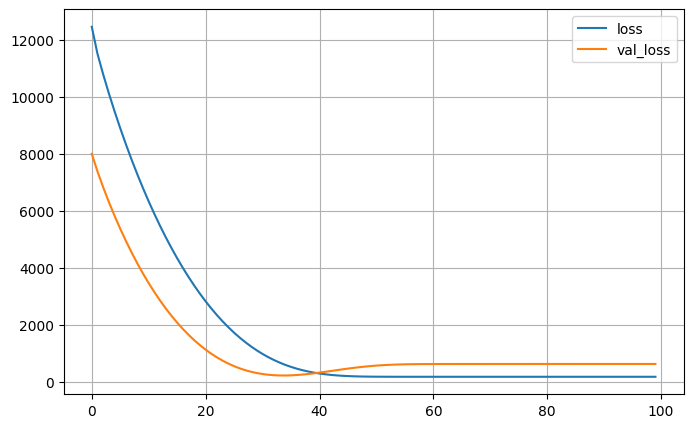

In [34]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Get the predictions on the test set.

In [35]:
y_pred = model.predict(X_test[...,np.newaxis]).ravel()
y_pred

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([115.40224, 115.40224, 115.40224, ..., 115.40224, 115.40224,
       115.40223], dtype=float32)

Then compute the MSE and movement accuracy on the test set.

In [36]:
mean_squared_error(y_test, y_pred)

93.1719952098698

In [37]:
movement_pred = X_test[:,-1] < y_pred.ravel()
accuracy_score(movement_test, movement_pred)

0.5071551230681167

Comment: From the learning curve there is no overfitting.

(Additional comment: The MSE and movement accuracy are slightly worse than random forest, with the movement accuracy slightly below 50%.)

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**Solution**

Recreate the `X` and `y` variables in the form required for 3-steps ahead predictions.

Here, we also subtract 2 from `train_idx` and `valid_idx` to make sure all values of `y_train_3ahead` are entirely before 2010. But it is acceptable to just use `train_idx` and `valid_idx` without subtracting 2, which is what is done in the lecture notes. (Subtracting by 2 here, the first instance of `y_valid_3ahead` includes the 2nd last valid time in December 2009, the last valid time in December 2009, and the first valid time in January 2010. If not Subtracting by 2, it includes the first, second and third valid times in January 2010.)

In [38]:
X_3ahead, y_3ahead = ts_split(ts,feature_steps=time_steps, target_steps=3)

X_train_3ahead = X_3ahead[:(train_idx-2)]
y_train_3ahead = y_3ahead[:(train_idx-2)]
X_valid_3ahead = X_3ahead[(train_idx-2):(valid_idx-2)]
y_valid_3ahead = y_3ahead[(train_idx-2):(valid_idx-2)]
X_test_3ahead = X_3ahead[(valid_idx-2):]
y_test_3ahead = y_3ahead[(valid_idx-2):]

print(X_train_3ahead.shape)
print(y_train_3ahead.shape)

(5021, 10)
(5021, 3)


There are multiple ways to create an RNN to predict 3-steps ahead. Any of the below solutions are acceptable. Method 1 is the most natural method, so our solution and the comment will focus on that. Only Method 3 is better than random forest in terms of 1-step ahead prediction RMSE.

Method 1: At time step 10, predict time steps 11, 12 and 13.

In [40]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(3)
])

logging.set_verbosity(logging.ERROR) #This is to suppress some warnings

model.compile(loss="mse", optimizer="nadam")

run = model.fit(X_train_3ahead[..., np.newaxis],
                y_train_3ahead[..., np.newaxis],
                epochs=100,
                validation_data=(X_valid_3ahead[..., np.newaxis], 
                                 y_valid_3ahead[..., np.newaxis]))

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13130.0674 - val_loss: 8396.1748
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12183.4551 - val_loss: 7781.7612
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11446.8838 - val_loss: 7218.4556
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10761.4287 - val_loss: 6690.9287
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10113.3672 - val_loss: 6194.0278
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9497.6025 - val_loss: 5725.0088
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8911.3164 - val_loss: 5282.0361
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8352.5889 - val_loss: 4863.7104
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7819.9570 - val_loss: 4468.8794
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7312.2070 - val_loss: 4096.5532
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68

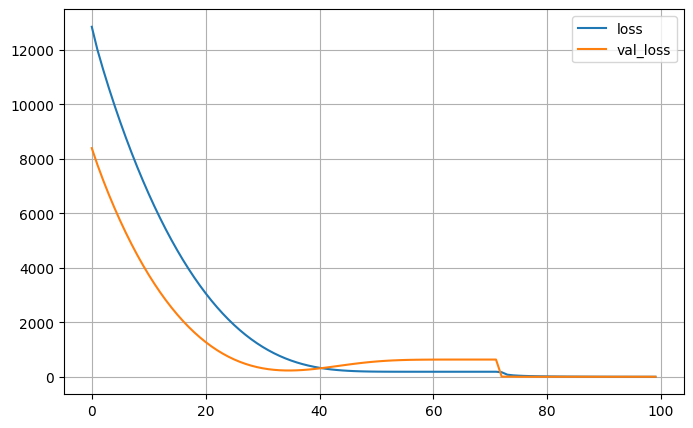

In [41]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Get the predictions on the test set.

In [42]:
y_pred = model.predict(X_test_3ahead[..., np.newaxis])
y_pred

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[120.61295, 120.5582 , 120.42864],
       [120.75759, 120.70399, 120.57155],
       [120.48966, 120.43244, 120.30275],
       ...,
       [133.00217, 133.01065, 132.72125],
       [133.07971, 133.09041, 132.80925],
       [133.53003, 133.54192, 133.26425]], dtype=float32)

Now compute the MSE and movement accuracy on the test set for 1-step, 2-steps and 3-steps ahead.

In [43]:
mean_squared_error(y_test_3ahead, y_pred, multioutput="raw_values")

array([0.57554207, 0.99941297, 1.4003569 ])

In [44]:
movement_test_1ahead = X_test_3ahead[:,-1] < y_test_3ahead[:,0]
movement_test_2ahead = X_test_3ahead[:,-1] < y_test_3ahead[:,1]
movement_test_3ahead = X_test_3ahead[:,-1] < y_test_3ahead[:,2]
movement_pred_1ahead = X_test_3ahead[:,-1] < y_pred[:,0]
movement_pred_2ahead = X_test_3ahead[:,-1] < y_pred[:,1]
movement_pred_3ahead = X_test_3ahead[:,-1] < y_pred[:,2]

print(accuracy_score(movement_test_1ahead, movement_pred_1ahead))
print(accuracy_score(movement_test_2ahead, movement_pred_2ahead))
print(accuracy_score(movement_test_3ahead, movement_pred_3ahead))

0.4997137950772753
0.4939896966227819
0.5002862049227247


Comment: From the learning curve there is no overfitting.

(Additional comment: We see the MSEs get worse the further out they are, and the movement accuracies are around 50% as before, but also get worse the further out they are. Again, the 1-step ahead MSE and movement accuracy are slightly worse than random forest.)

Method 2: At time step 8, predict time step 11. At time step 9, predict time step 12. At time step 10, predict time step 13.

In [46]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)),
    tf.keras.layers.Lambda(lambda Y_pred: Y_pred[:, -3:])
])

model.compile(loss="mse", optimizer="nadam")

logging.set_verbosity(logging.ERROR) #This is to suppress some warnings

run = model.fit(X_train_3ahead[..., np.newaxis],
                y_train_3ahead[..., np.newaxis],
                epochs=100,
                validation_data=(X_valid_3ahead[..., np.newaxis], 
                                 y_valid_3ahead[..., np.newaxis]), verbose=0)


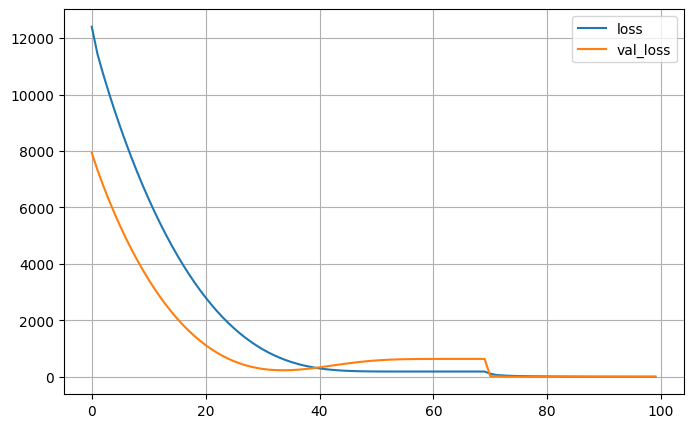

In [47]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [48]:
y_pred = model.predict(X_test_3ahead[...,np.newaxis])[...,0]
mean_squared_error(y_test_3ahead, y_pred, multioutput="raw_values")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([1.57148799, 1.55051789, 1.56889528])

In [49]:
movement_pred_1ahead = X_test_3ahead[:,-1] < y_pred[:,0]
movement_pred_2ahead = X_test_3ahead[:,-1] < y_pred[:,1]
movement_pred_3ahead = X_test_3ahead[:,-1] < y_pred[:,2]

print(accuracy_score(movement_test_1ahead, movement_pred_1ahead))
print(accuracy_score(movement_test_2ahead, movement_pred_2ahead))
print(accuracy_score(movement_test_3ahead, movement_pred_3ahead))

0.49170005724098453
0.4922724670864339
0.47967945048654836


Method 3: At time step 1, predict time steps 2, 3 and 4. At time step 2, predict time steps 3, 4 and 5, etc. At time step 10, predict time steps 11, 12 and 13. Train the model based on all predictions but evaluate the model based only on the predictions at time step 10.

We need to adjust the X and y variable again for this RNN architecture. As explained above, it's fine to not subtract 2 from `train_idx` and `valid_idx`.

In [50]:
n_steps = 10
n_ahead = 3
n_sample = X_3ahead.shape[0]
series = np.concatenate((X_3ahead, y_3ahead), axis=1)[...,np.newaxis]
X_train = series[:(train_idx-2), :n_steps]
X_valid = series[(train_idx-2):(valid_idx-2), :n_steps]
X_test = series[(valid_idx-2):, :n_steps]
Y = np.empty((n_sample, n_steps, n_ahead))
for step_ahead in range(1, n_ahead + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
y_train = Y[:(train_idx-2)]
y_valid = Y[(train_idx-2):(valid_idx-2)]
y_test = Y[(valid_idx-2):]

print(X_train.shape)
print(y_train.shape)

(5021, 10, 1)
(5021, 10, 3)


In [52]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(3))
])

logging.set_verbosity(logging.ERROR) #This is to suppress some warnings

def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer="nadam",metrics=[last_time_step_mse])

run = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid), verbose=0)

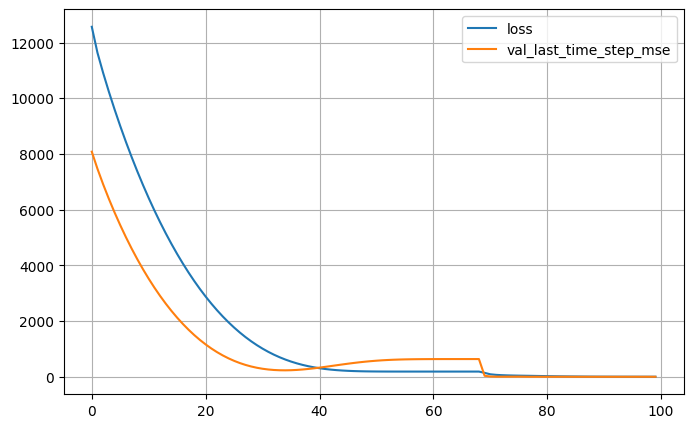

In [71]:
# Removes all the curves except the two we care about: loss and val_last_time_step_mse
run_history = {key: run.history[key] for key in ('loss', 'val_last_time_step_mse')}
pd.DataFrame(run_history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [72]:
y_pred = model.predict(X_test)
mean_squared_error(y_test[:, -1], y_pred[:, -1], multioutput="raw_values")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([0.61839324, 1.04582798, 1.4488284 ])

In [73]:
movement_pred_1ahead = X_test_3ahead[:,-1] < y_pred[:, -1][:,0]
movement_pred_2ahead = X_test_3ahead[:,-1] < y_pred[:, -1][:,1]
movement_pred_3ahead = X_test_3ahead[:,-1] < y_pred[:, -1][:,2]

print(accuracy_score(movement_test_1ahead, movement_pred_1ahead))
print(accuracy_score(movement_test_2ahead, movement_pred_2ahead))
print(accuracy_score(movement_test_3ahead, movement_pred_3ahead))

0.5105895821408128
0.499141385231826
0.5163136805953062


Finally, this model has better 1-step ahead RMSE than random forest!

While it is not required in the question, you can try replacing the `SimpleRNN` layers with `LSTM` layers, the results are essentially the same.